#**Project Name: Fake News Detection and Evaluation with Confusion Matrix**


# **Problem Statement:**


This project addresses the challenge of distinguishing fake news from true news using machine learning techniques. A classification model is trained on textual data, and its effectiveness is evaluated through a confusion matrix to assess accuracy and misclassification patterns.

# **Data Introduction:**

This dataset was compiled from real-world sources; the genuine articles were scraped from Reuters.com (a reputable news website). In contrast, the fake news articles were gathered from various unreliable platforms identified by Politifact (a U.S.-based fact-checking organization) and Wikipedia. The collection covers articles on diverse subjects, though most of them center around politics and world news.

The dataset cab also be downloaded from kaggle using the link: www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets

# **Import Packages**

Imported all required libraries and installed any missing packages in Google Colab.

In [41]:
# installed missing package gensim
!pip install gensim

In [42]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Preprocessing**

In [43]:
# read the csv file using pandas dataframe
fake_news_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/csv/fake.csv")
true_news_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/csv/true.csv")

**Q1.** View the imported csv file data using Pandas Dataframe.

In [44]:
import pandas as pd

# Load datasets
fake_news_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/csv/fake.csv")
true_news_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/csv/true.csv")

# View first 5 rows
print("Fake News Dataset:")
display(fake_news_data.head())

print("True News Dataset:")
display(true_news_data.head())

Fake News Dataset:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


True News Dataset:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [45]:
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

In [46]:
# merged true and fake news datasets
merged_data = [fake_news_data,true_news_data]
df = pd.concat(merged_data,axis=0)

**Q2.** drop rows from the dataset consisting null values.

In [47]:
# Drop rows with missing values
fake_news_data = fake_news_data.dropna()
true_news_data = true_news_data.dropna()

print("Fake news dataset shape after dropping nulls:", fake_news_data.shape)
print("True news dataset shape after dropping nulls:", true_news_data.shape)

Fake news dataset shape after dropping nulls: (23481, 5)
True news dataset shape after dropping nulls: (21417, 5)


**Q3.** shuffle the data.

In [48]:
# Shuffle the fake dataset
fake_news_data = fake_news_data.sample(frac=1)

# Shuffle the true dataset
true_news_data = true_news_data.sample(frac=1)

In [49]:
#reset index of the merged dataframe
df = df.reset_index(drop=True)

In [50]:
# view top 10 rows of processed dataset
df.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",1
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",1
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",1


**Q4.** view the text content of a random data point.

In [51]:
# Just the 'text' column from one random row
print(fake_news_data['text'].sample(1).values[0])

print(true_news_data['text'].sample(1).values[0])

Not-My-President-Elect Donald Trump s claim that millions of voters had cast illegal ballots on election day has become a contentious issue because there is zero evidence to back up such an assertion. Trump s Twitter timeline is the epitome of  fake news.  In ncourt filings submitted by Trump s own attorneys in Pennsylvania and Michigan objecting to recount efforts by Green Party candidate Jill Stein, it states that there is  no evidence that any voter fraud had occurred,  according to the Washington Post.The filing in Michigan states: On what basis does Stein seek to disenfranchise Michigan citizens? None really, save for speculation,  the filing reads.  All available evidence suggests that the 2016 general election was not tainted by fraud or mistake. The lawyers state,  Stein aims to sow doubts regarding the legitimacy of the presidential election.  That s pretty ironic considering that that is precisely what Trump tried to do for years during President Obama s two terms.In the Penn

**Data Visualization**

Text(0, 0.5, 'Number of News')

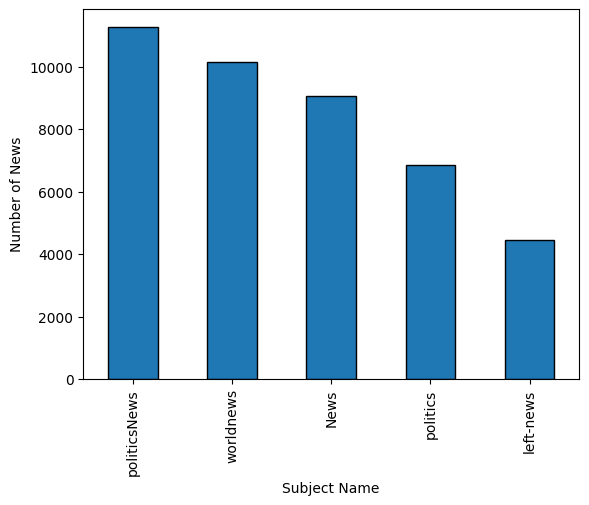

In [52]:
#create a data visualzation of bar/column/line chart of top 5 subjects ->
top_5_subjects = (df['subject'].value_counts()).nlargest(5)
top_5_subjects.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subject Name')
plt.ylabel('Number of News')

**Q5.** Create a pie chart to find the pecentage of news on differenet subject.

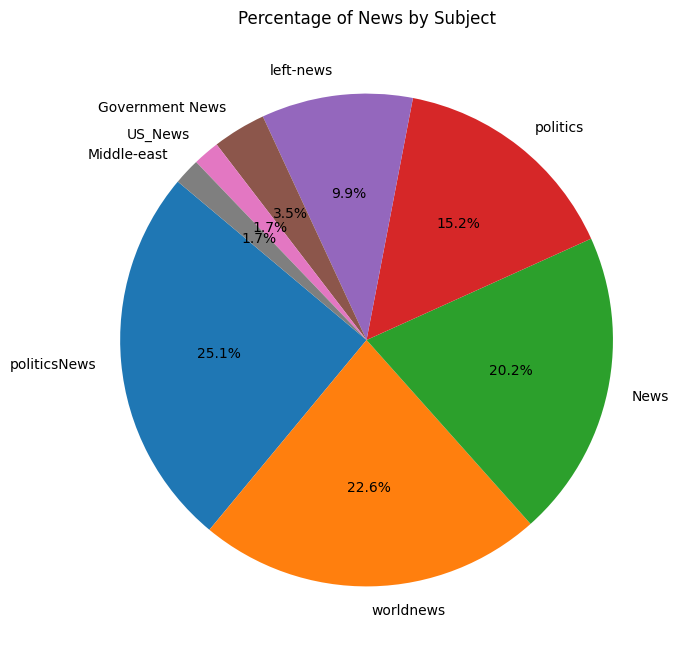

In [53]:
# Count number of news articles by 'subject'
subject_counts = df['subject'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8,8))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of News by Subject")
plt.show()

**Text Processing**

In [54]:
# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\S+|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

In [55]:
# drop unnecessary columns for classification purpose
df1= df.drop(['title','subject','date'],axis=1)

In [56]:
# apply wordopt method to the whole dataset and view the text content of a random data point
df1['text']=df1['text'].apply(wordopt)
df1['text'][100]

'former vice president joe biden was asked on monday by matt lauer on nbc s today to name something specific that donald trump has been doing well well that seems like a trick question since trump has passed no major legislation and reaches across the aisle only to take shots at democrats in his twitter timeline during his morning rage tweets so biden struggled to find something anything that trump has done well since taking office i think there s a number of things he s doing well but even the things he s doing well it s how he does them biden said it s more the tone of this administration that bothers me he continued with all due respect you haven t come up with one thing you think he s doing well lauer said well i think he married very well biden joked although biden didn t mention which of trump s three marriages he s speaking of trump s first marriage to ivana ended after he had an affair with marla maples trump went on to marry maples then they divorced trump is currently married

# **Building Model**

In [57]:
# Separate independent and target columns from the dataset and stored them in x & y variables
x= df1['text']
y= df1['class']

**Q6.** Split the dataset into training and testing sets with 25% test size and store them in x_train, x_test, y_train, and y_test.

In [58]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets, keeping class proportions
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

# Print the size of training and testing datasets
print("Training data size:", x_train.shape[0])
print("Testing data size:", x_test.shape[0])

Training data size: 33673
Testing data size: 11225


## **Word Embedding ( Word2Vec )**

In [59]:
# import bbc_news data using url link in json format for training Word2Vec word embedding model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content']
print("Size of Word Dictonary for training Word2Vec: ",news_seg.shape[0])
news_seg.head(2)

Size of Word Dictonary for training Word2Vec:  15825


,content
0,The heroin substitute methadone can be used as...
1,The eldest son of North Korean leader Kim Jong...


In [60]:
# apply wordopt function for text processing
news_seg=news_seg.apply(wordopt)
sentences = [sentence.split() for sentence in news_seg ]
w2v_model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [61]:
# function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [62]:
# convert train and test dataset into vector form
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])

##**Logistic Regression**

In [63]:
# Trains a Logistic Regression model using vector formed trained data ->
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(xv_train,y_train)

LogisticRegression()

In [64]:
# detect the class(fake or true) on test data and evaluates its accuracy on test set
y_pred = logistic_model.predict(xv_test)
print("Prediction on test data: ",y_pred)
print("Accuracy Score on Test Data: ",logistic_model.score(xv_test,y_test))

Prediction on test data:  [1 0 1 ... 1 0 0]
Accuracy Score on Test Data:  0.9440534521158129


####**Accuracy Checking**

In [65]:
# Check Precision, Recall, F1 Score of the logistic model ->
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9440534521158129
Precision: 0.9505069599587558
Recall: 0.942088230284449
F1 score: 0.946278870829769


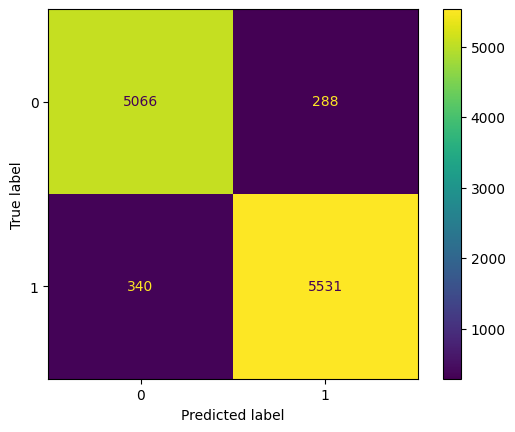

In [66]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

##**Random Forest Classifier**

####**Model Building and Prediction**

**Q7.** Use Random Forest Classifer for this classfication purpose and predict the outcomes for test data.

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(xv_train, y_train)

# Predict on test set
y_rf_pred = rf_model.predict(xv_test)

####**Accuracy Checking**

**Q8.** Find the accuracy, precison, recall, F1 Score of the model while using Random Forest Classsifier and visualize overall accuracy using confusion matrix.

Random Forest Performance:
Accuracy: 0.9434298440979956
Precision: 0.9455411844792376
Recall: 0.9463464486458866
F1 Score: 0.9459436451860049


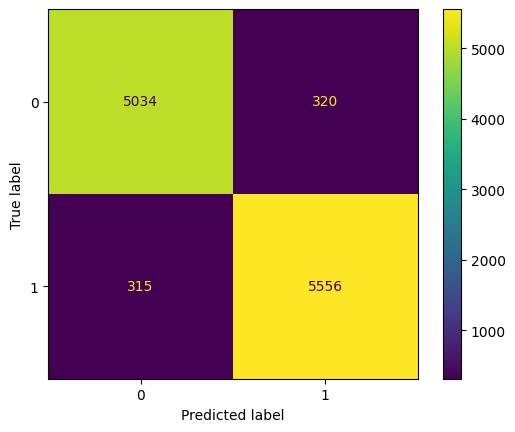

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Precision:", precision_score(y_test, y_rf_pred))
print("Recall:", recall_score(y_test, y_rf_pred))
print("F1 Score:", f1_score(y_test, y_rf_pred))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_rf_pred)
ConfusionMatrixDisplay(cm_rf).plot()
plt.show()

#**Save the Model using pickle**

In [69]:
# save the logistic regression model as pickle file
import pickle
filename1 = '/content/drive/My Drive/Colab Notebooks/csv/word2vec_logistic_model.pickle'
pickle.dump(logistic_model, open(filename1, 'wb')) #word2vec model

In [70]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.9440534521158129


**Q9.** Save the trained Random Forest Model as pickle/svg file in your desired repository for further use.

In [71]:
import pickle

# Path to save Random Forest model
filename_rf = '/content/drive/My Drive/Colab Notebooks/csv/word2vec_rf_model.pickle'

# Save the trained Random Forest model
pickle.dump(rf_model, open(filename_rf, 'wb'))

print("Random Forest model saved successfully!")

Random Forest model saved successfully!


**Q10.** Load that saved model in another Notebook use it on other dataset for fake news detection.

In [72]:
import pickle
import pandas as pd
import numpy as np
import re

# Function to preprocess text (same as the one used during training)
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\S+|www\.\S+','',text)
  text = re.sub(r'[^\w]',' ', text)
  text= re.sub(r'\s+',' ',text)
  return text

def vectorize(sentence, w2v_model):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

filename_rf = '/content/drive/My Drive/Colab Notebooks/csv/word2vec_rf_model.pickle'

# Load the trained Random Forest model
loaded_rf_model = pickle.load(open(filename_rf, 'rb'))

print("Model loaded successfully. Ready to predict on new data.")

Model loaded successfully. Ready to predict on new data.


**Q11(Optional).**


1.  Try to enhance the model's accuracy by using adaboost or any other boosting methods.
2.  Use TF-IDF or any other vectorizer instead of Word2Vec and study how much it affects on model's accuracy.






### **Using TF-IDF Vectorizer**

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data
xv_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the testing data
xv_test_tfidf = tfidf_vectorizer.transform(x_test)

print("TF-IDF vectorized training data shape:", xv_train_tfidf.shape)
print("TF-IDF vectorized testing data shape:", xv_test_tfidf.shape)

TF-IDF vectorized training data shape: (33673, 105125)
TF-IDF vectorized testing data shape: (11225, 105125)


### **Logistic Regression with TF-IDF**

Logistic Regression with TF-IDF Performance:
Accuracy: 0.9848552338530067
Precision: 0.9863504521412728
Recall: 0.9846704138988247
F1 Score: 0.9855097170132969


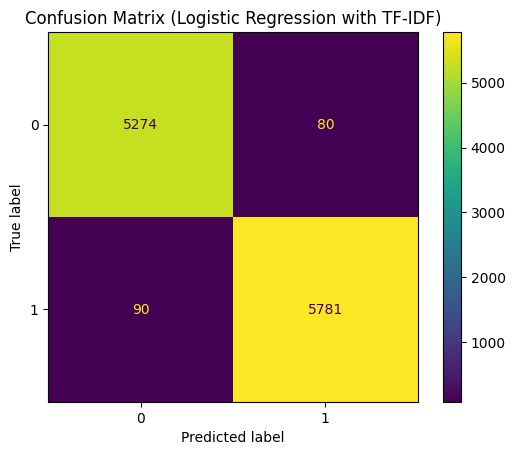

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Train Logistic Regression model with TF-IDF
logistic_model_tfidf = LogisticRegression()
logistic_model_tfidf.fit(xv_train_tfidf, y_train)

# Predict on the test set
y_pred_tfidf_lr = logistic_model_tfidf.predict(xv_test_tfidf)

# Evaluate performance
print("Logistic Regression with TF-IDF Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf_lr))
print("Precision:", precision_score(y_test, y_pred_tfidf_lr))
print("Recall:", recall_score(y_test, y_pred_tfidf_lr))
print("F1 Score:", f1_score(y_test, y_pred_tfidf_lr))

# Confusion matrix
cm_tfidf_lr = confusion_matrix(y_test, y_pred_tfidf_lr)
ConfusionMatrixDisplay(cm_tfidf_lr).plot()
plt.title("Confusion Matrix (Logistic Regression with TF-IDF)")
plt.show()

### **Random Forest with TF-IDF**

Random Forest with TF-IDF Performance:
Accuracy: 0.9914476614699332
Precision: 0.9938429964084146
Recall: 0.9897802759325498
F1 Score: 0.9918074756784434


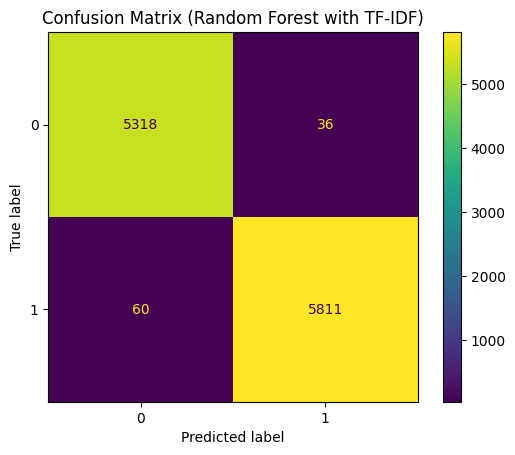

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Train Random Forest model with TF-IDF
rf_model_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_tfidf.fit(xv_train_tfidf, y_train)

# Predict on test set
y_pred_tfidf_rf = rf_model_tfidf.predict(xv_test_tfidf)

# Evaluate performance
print("Random Forest with TF-IDF Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf_rf))
print("Precision:", precision_score(y_test, y_pred_tfidf_rf))
print("Recall:", recall_score(y_test, y_pred_tfidf_rf))
print("F1 Score:", f1_score(y_test, y_pred_tfidf_rf))

# Confusion matrix
cm_tfidf_rf = confusion_matrix(y_test, y_pred_tfidf_rf)
ConfusionMatrixDisplay(cm_tfidf_rf).plot()
plt.title("Confusion Matrix (Random Forest with TF-IDF)")
plt.show()

### **Using AdaBoost Classifier**

AdaBoost with Random Forest Base Estimator Performance (using Word2Vec):
Accuracy: 0.942271714922049
Precision: 0.9454204332253112
Recall: 0.944132175097939
F1 Score: 0.94477586500767


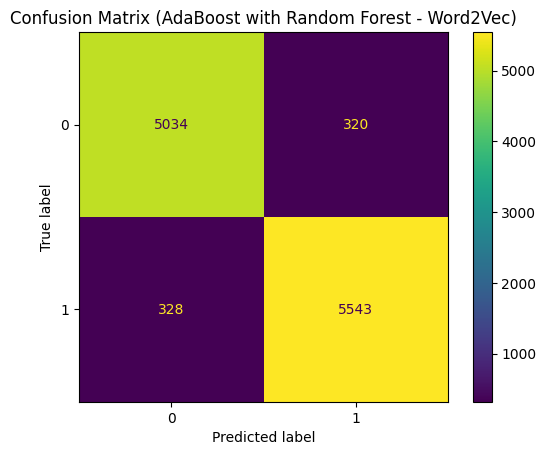

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize AdaBoost Classifier (using Random Forest as the base estimator)
# You can also use a DecisionTreeClassifier as the base estimator
adaboost_model_rf = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=50, random_state=42), n_estimators=100, random_state=42)

# Train AdaBoost model (using Word2Vec vectorized data)
adaboost_model_rf.fit(xv_train, y_train)

# Predict on the test set
y_pred_adaboost_rf = adaboost_model_rf.predict(xv_test)

# Evaluate performance
print("AdaBoost with Random Forest Base Estimator Performance (using Word2Vec):")
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost_rf))
print("Precision:", precision_score(y_test, y_pred_adaboost_rf))
print("Recall:", recall_score(y_test, y_pred_adaboost_rf))
print("F1 Score:", f1_score(y_test, y_pred_adaboost_rf))

# Confusion matrix
cm_adaboost_rf = confusion_matrix(y_test, y_pred_adaboost_rf)
ConfusionMatrixDisplay(cm_adaboost_rf).plot()
plt.title("Confusion Matrix (AdaBoost with Random Forest - Word2Vec)")
plt.show()

AdaBoost with Decision Tree Base Estimator Performance (using Word2Vec):
Accuracy: 0.9099331848552339
Precision: 0.9202698028363888
Recall: 0.9063191960483734
F1 Score: 0.9132412254355101


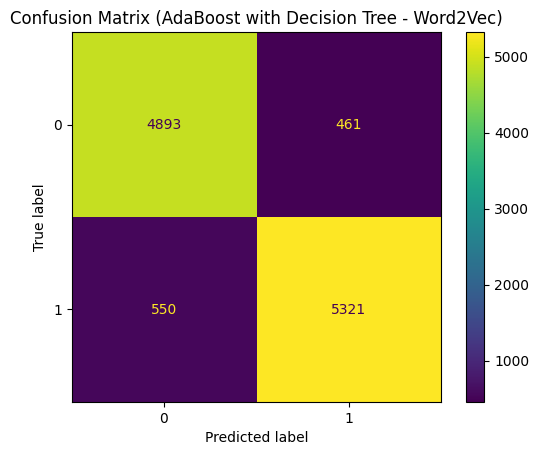

In [77]:
# Initialize AdaBoost Classifier (using Decision Tree as the base estimator)
adaboost_model_dt = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)

# Train AdaBoost model (using Word2Vec vectorized data)
adaboost_model_dt.fit(xv_train, y_train)

# Predict on the test set
y_pred_adaboost_dt = adaboost_model_dt.predict(xv_test)

# Evaluate performance
print("AdaBoost with Decision Tree Base Estimator Performance (using Word2Vec):")
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost_dt))
print("Precision:", precision_score(y_test, y_pred_adaboost_dt))
print("Recall:", recall_score(y_test, y_pred_adaboost_dt))
print("F1 Score:", f1_score(y_test, y_pred_adaboost_dt))

# Confusion matrix
cm_adaboost_dt = confusion_matrix(y_test, y_pred_adaboost_dt)
ConfusionMatrixDisplay(cm_adaboost_dt).plot()
plt.title("Confusion Matrix (AdaBoost with Decision Tree - Word2Vec)")
plt.show()